# Concrete Strength Regression

**Objective:**
To estimate the compressive strength of concrete based on components and age using multilinear regression.

**Problem Statement:**
Structural engineers need to know the strength of materials in order to design safe structures. As a machine learning developer working for an engineering company, your job is to analyze data to develop a model that predicts the compressive strength of concrete based on what it is made of and how old the concrete is. The model must also provide an uncertainty in the strength prediction so that engineers can ensure that the design is safe.

# 1. Data

In [ ]:
# import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

**a. Load *Concrete_Data_Yeh.csv* into a pandas dataframe. Print out the header. Use *pandas.DataFrame.describe* to summarize the data. Using markdown, explain the meaning of each column and make observations about the dataset.**


In [ ]:
# load the data uploaded to github into a pandas DataFrame
df = pd.read_csv("https://raw.githubusercontent.com/PKpacheco/dl_assignment_1/main/Concrete_Data_Yeh.csv")

In [ ]:
# print the header
df.head()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [ ]:
# summarize the data
df.describe()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


**Observations:**
* The dataset contains 8 features and 1 label.

**Description of the columns:**
1. Cement: how much cement in kg in a m3 mixture
2. slag: how much Blast Furnace Slag in kg in a m3 mixture
3. flyash: how much Fly Ash in kg in a m3 mixture
4. water: how much Water in kg in a m3 mixture
5. superplasticizer: how much Superplasticizer in kg in a m3 mixture
6. coarseaggregate: how much Coarse Aggregate in kg in a m3 mixture
7. fineaggregate: how much Fine Aggregate in kg in a m3 mixture
8. age: how many days since the concrete production in Day from 1 to 365
9. csMPa: Concrete compressive strength in MPa, the Label


* From the summary, we can see that the range of features varied, we should apply scaler before we put the data into model.



**b. Use *pandas.DataFrame.info* to check if the entries are the correct datatype, and if there are any missing values. Use *pandas.DataFrame.duplicates* to check for duplicate entries. Fix the dataset so that there are no missing values, duplicate rows, or incorrect data types. Use markdown to make observations and explain what you have done.**

In [ ]:
# check if the entries are of the expected datatype
# and if there are any missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cement            1030 non-null   float64
 1   slag              1030 non-null   float64
 2   flyash            1030 non-null   float64
 3   water             1030 non-null   float64
 4   superplasticizer  1030 non-null   float64
 5   coarseaggregate   1030 non-null   float64
 6   fineaggregate     1030 non-null   float64
 7   age               1030 non-null   int64  
 8   csMPa             1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [ ]:
# check for duplicate entries
df.duplicated().sum()

25

In [ ]:
# show the duplicate entries
duplicateRows = df[df.duplicated()]
duplicateRows

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
77,425.0,106.3,0.0,153.5,16.5,852.1,887.1,3,33.40
80,425.0,106.3,0.0,153.5,16.5,852.1,887.1,3,33.40
86,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3,35.30
88,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3,35.30
91,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3,35.30
100,425.0,106.3,0.0,153.5,16.5,852.1,887.1,7,49.20
103,425.0,106.3,0.0,153.5,16.5,852.1,887.1,7,49.20
109,362.6,189.0,0.0,164.9,11.6,944.7,755.8,7,55.90
111,362.6,189.0,0.0,164.9,11.6,944.7,755.8,7,55.90
123,425.0,106.3,0.0,153.5,16.5,852.1,887.1,28,60.29


In [ ]:
# remove duplicate rows
df.drop_duplicates(inplace=True)

# check for duplicated rows again to confirm
df.duplicated().sum()

0

In [ ]:
# check for null value
df.isna().sum()

cement              0
slag                0
flyash              0
water               0
superplasticizer    0
coarseaggregate     0
fineaggregate       0
age                 0
csMPa               0
dtype: int64

**Observations**

* There is no missing values in dataset and all columns are of data type float or int, this match our expectation.
* There are 1030 non-null rows.
* There are 25 duplicated rows. We used the drop_duplicates() method to remove these entries. After this operation, there are 1005 entries in the dataset.
* We use the isna() method to check for NaN value and confirm that all the values are not null.

**c. Use *seaborn.heatmap* to display the correlation matrix of the features. Use *seaborn.pairplot* to generate scatter plots and histograms. Use markdown to make observations and comment on which features are most correlated with compressive strength.**

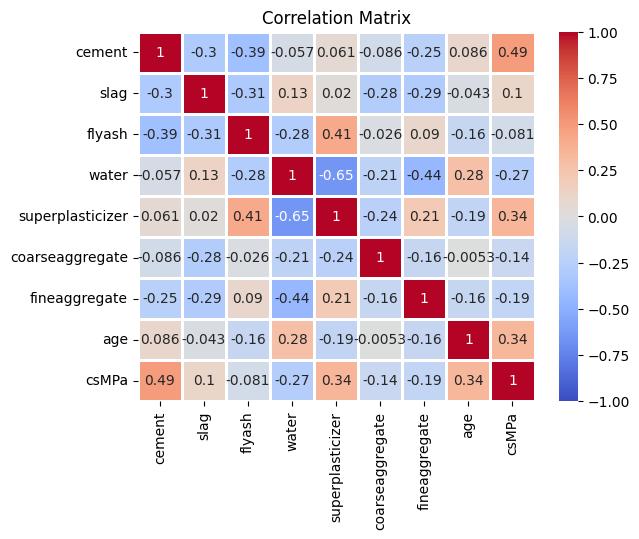

In [ ]:
# associate correlation dataframe to a variable
correlation_matrix = df.corr()

# generate the heatmap using seaborn
# change the color to coolwarm preset colors
# positive correlations are red and negative are blue
sns.heatmap(correlation_matrix, cmap='coolwarm', vmin=-1, vmax=1, linewidths=1, annot=True)

# create a title to correlation map
plt.title('Correlation Matrix')
# display the heatmap
plt.show()

**Observations:**

* Cement has the strongest positive correlation with compressive strength (csMPa) among the features, with a value of 0.49, indicating that as cement increases, compressive strength increases too.
* Cement also has positive correlation with superplasticizer and age; both are of 0.34.
* On the other hand, water has the strongest negative correlation with compressive strength at -0.65, suggesting that as water increases, compressive strength tends to decrease.

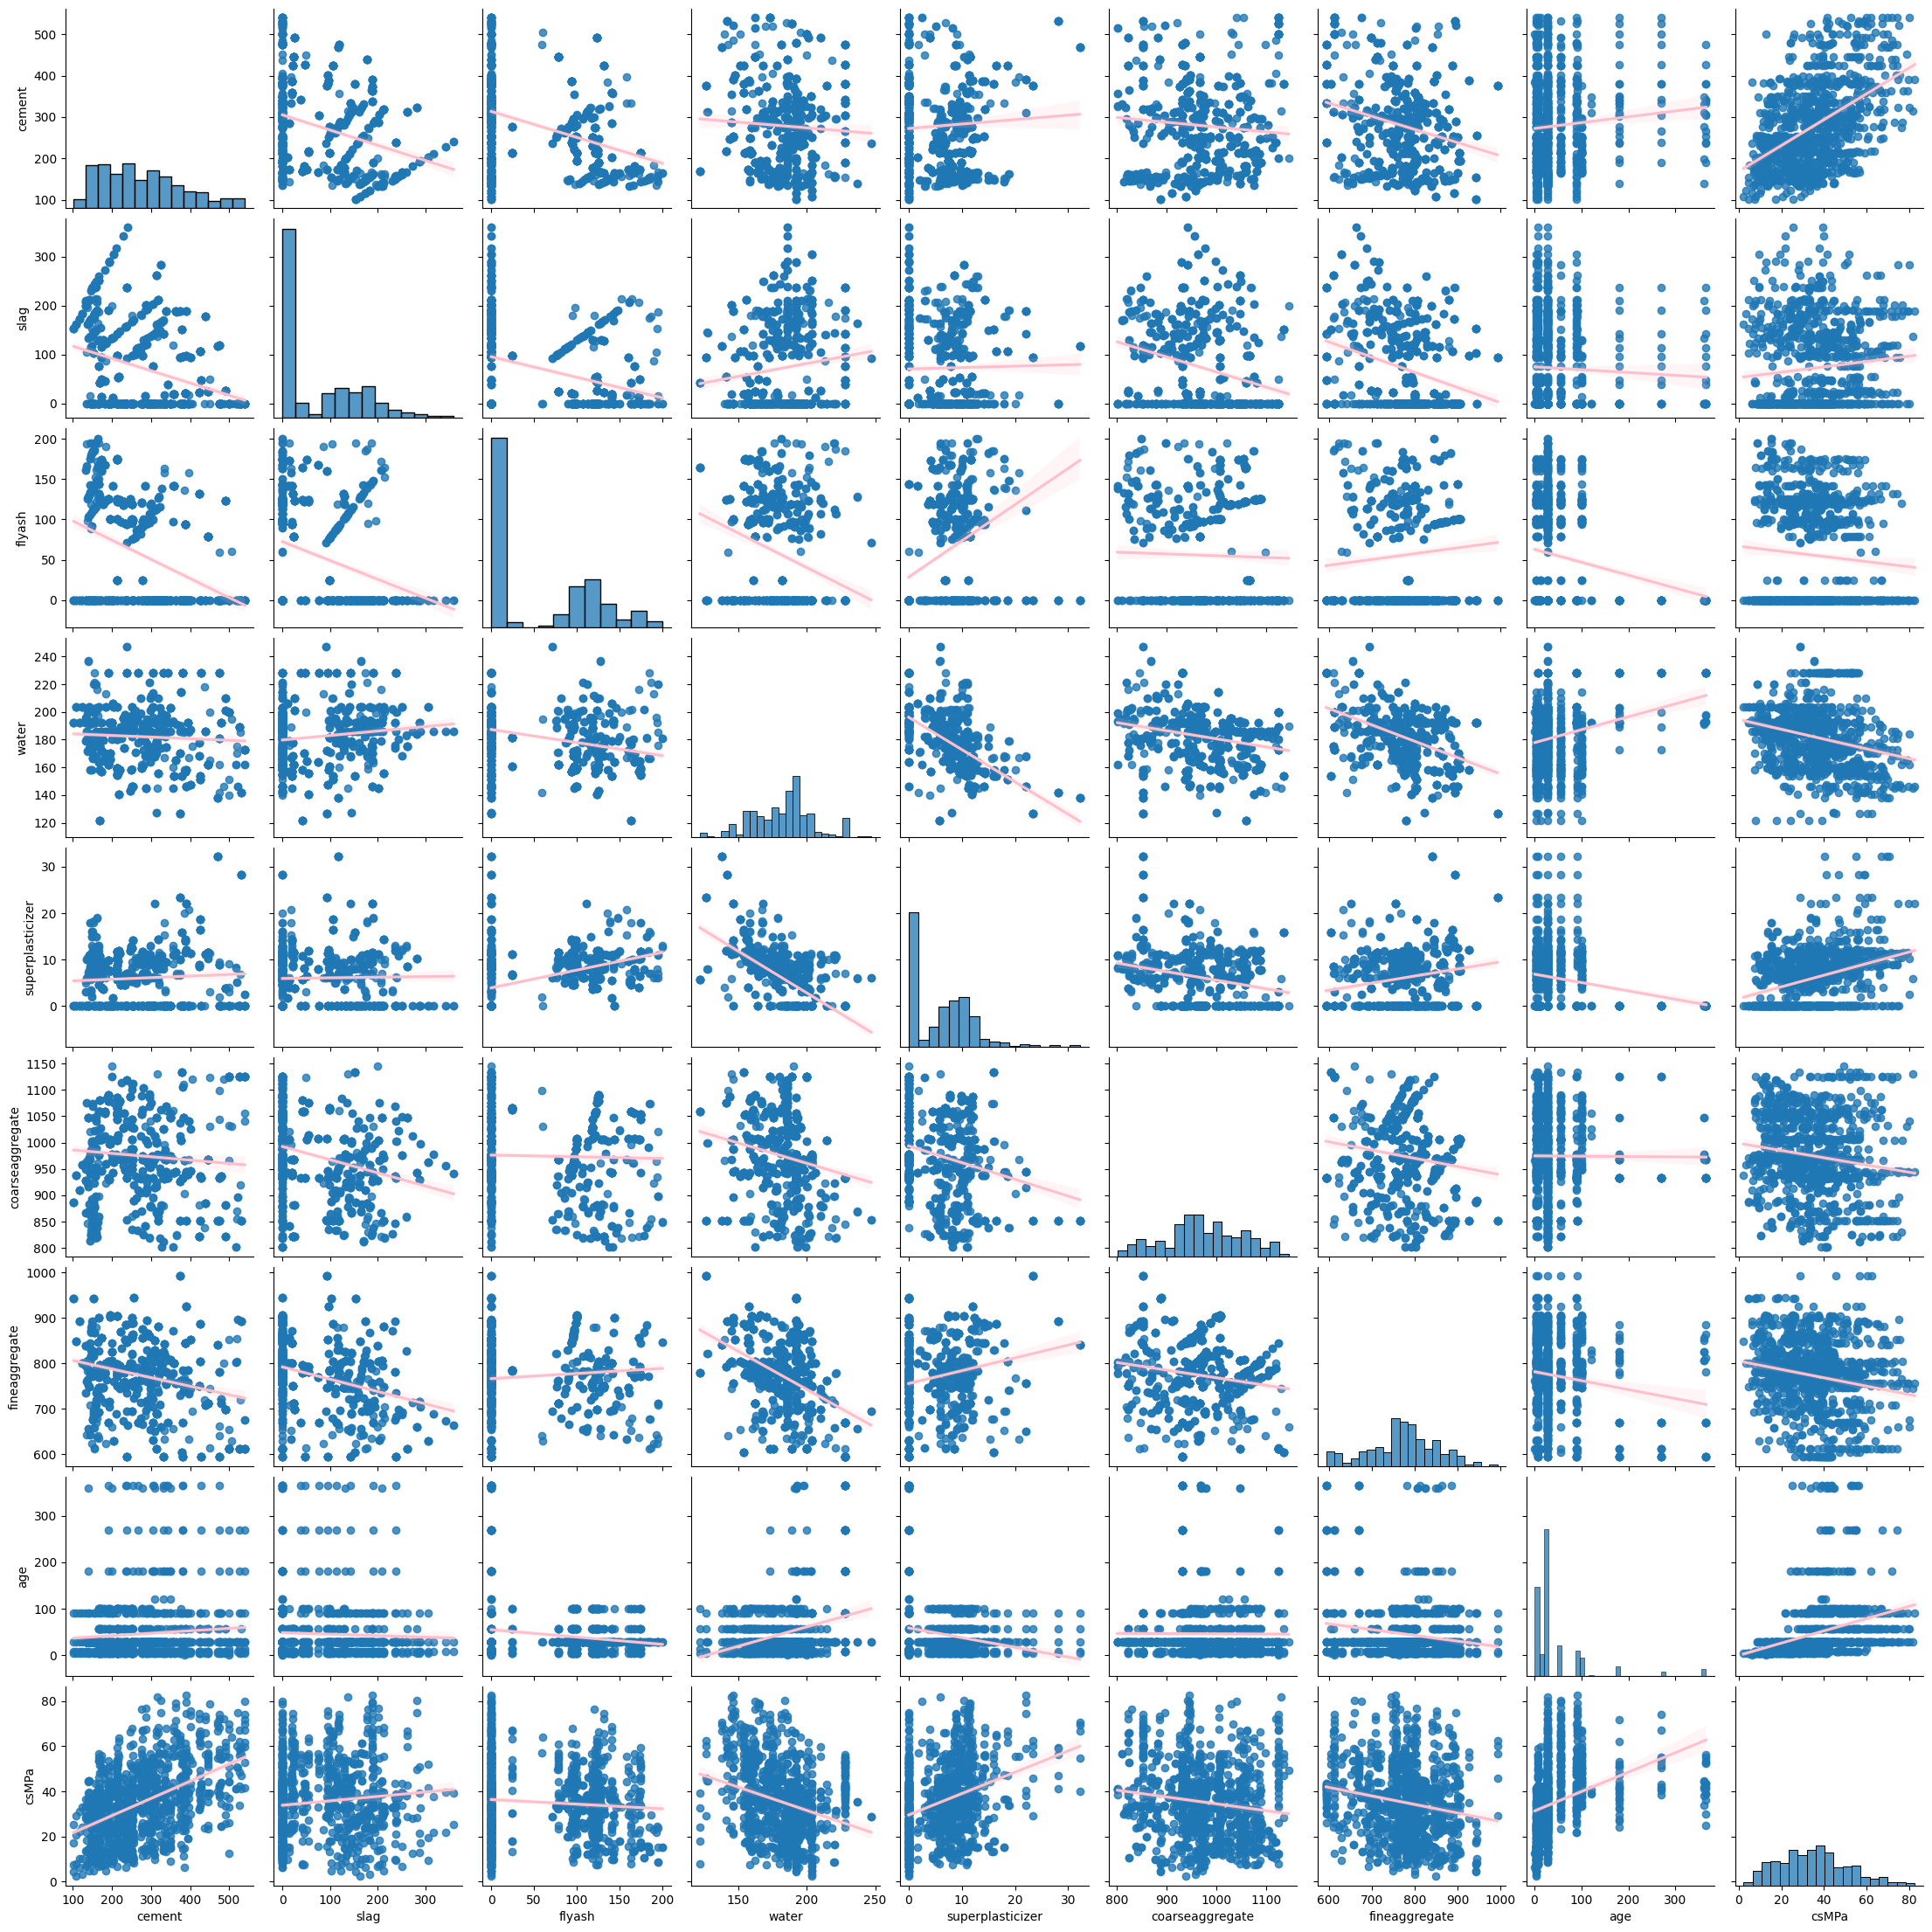

In [ ]:
# Generate scatter plots and histograms
sns.pairplot(df, kind='reg', plot_kws={'line_kws':{'color':'pink'}})
plt.show()

**Observation:**

* The pairplot shows cement is the feature that is the most related to compressive strength.
* There are features like flyash and superplasticizer that contain many zero values, but they do not show any positive and negative effects on compressive strength, indicating the present of features like these might vary accoridng to the type of concrete being used, design specifications, etc.

**d. Move the labels to a separate dataframe. Use *sklearn.preprocessing.MinMaxScaler* to scale the features (but not the labels). Split the data so that 10% is used for testing and 90% for training.**

In [ ]:
# obtain the features for scaling
X = df.drop(columns=["csMPa"])

# move the label to a separate dataframe
y = df["csMPa"]

In [ ]:
# use sklearn.preprocessing.MinMaxScaler to scale the features
scaler = MinMaxScaler()

# scale the features
scaled_X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [ ]:
# show the scaled dataframe
scaled_X.head()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age
0,1.000000,0.000000,0.0,0.321086,0.07764,0.694767,0.205720,0.074176
1,1.000000,0.000000,0.0,0.321086,0.07764,0.738372,0.205720,0.074176
2,0.526256,0.396494,0.0,0.848243,0.00000,0.380814,0.000000,0.739011
3,0.526256,0.396494,0.0,0.848243,0.00000,0.380814,0.000000,1.000000
4,0.220548,0.368392,0.0,0.560703,0.00000,0.515698,0.580783,0.986264


In [ ]:
# obtain the training and testing sets with 90% and 10% of the data respectively
features_train, features_test, label_train, label_test = train_test_split(scaled_X, y, train_size=0.9, random_state=80)

# 2. Modeling

(Hint: refer to Exercise 2.02 for help with these steps but note that here we are doing regression while the exercise is on classification, so there are some significant differences.)

**a. For both the train and test datasets, save the csMPA column (the label *y*) as a 2d tensorflow variable and the other columns (the features *x*) as a separate 2d tensorflow variable.**

In [ ]:
# save the csMPa as a 2D tf variable
y_train = tf.Variable(label_train, dtype=tf.float32)
y_test = tf.Variable(label_test, dtype=tf.float32)

# reshape the tf to fit the data requirement
y_train = tf.reshape(y_train, [y_train.shape[0],1])
y_test = tf.reshape(y_test, [y_test.shape[0],1])

In [ ]:
# save the features as a 2D tf variable
X_train = tf.Variable(features_train, dtype=tf.float32)
X_test = tf.Variable(features_test, dtype=tf.float32)

**b. Use *tf.zeros* to create tensorflow variables of the appropriate shape for the weights (*w*) and bias (*b*).**

In [ ]:
# setup the appropriate shape for weight
NUM_FEATURES = X_train.shape[1]

# setup the appropriate shape for weight and bias
NUM_OUTPUT = 1

In [ ]:
# define the connections weight matrix
weight = tf.Variable(tf.zeros([NUM_FEATURES, NUM_OUTPUT]))

# create the variable for bias
bias = tf.Variable(tf.zeros([NUM_OUTPUT]))

**c. Write a regression function to implement the equation *z = xw + b*
 and return the value *z*.** (This is similar to the *perceptron* function in Exercise 2.02, but without the extra step of using *tf.sigmoid*. Note that multilinear regression is similar to a perceptron but does not use an activation function.)

In [ ]:
# define the regression function
def regression(x):
  z = tf.matmul(x, weight) + bias
  return z

**d. Write a loss function as a *lambda* function.**

In [ ]:
# define the loss function
def loss(x, y):
  return lambda: abs(y - regression(x))

**e. Write a train function that uses *tf.optimizer.SGD* to minimize the loss with respect to *w* and *b*. Choose an appropriate learning rate. Train a model for at least 1000 epochs on training data.**

In [ ]:
# define the train function with learning rate and number of epochs
# define the optimizer using SGD
# Gradient descent (with momentum) optimizer
def train(x, y, learning_rate=0.01, epochs=1000):
  optimizer = tf.optimizers.SGD(learning_rate)
  for epoch in range(epochs):
    optimizer.minimize(loss(x,y), [weight, bias])

In [ ]:
# train using training data
train(X_train, y_train)

**f. Print out the trained weights and bias. Use the regression function you wrote to predict the strength for each row of *training* data. Write a function to find the root-mean-squared-error of the predictions and use it to print out the RMSE of the model.**

In [ ]:
# print the trained weights and bias
print('Trained Weight =')
tf.print(weight)
print('\nTrained Bias =')
tf.print(bias)

Trained Weight =
[[52.5801697]
 [34.215168]
 [16.4940529]
 ...
 [2.66799331]
 [6.48252535]
 [52.2613029]]

Trained Bias =
[1.23998821]


In [ ]:
# predict using the regression function for *training* data
y_pred_train = regression(X_train)

In [ ]:
# print the predictions
tf.print(y_pred_train)

[[48.176815]
 [59.0615692]
 [28.4677601]
 ...
 [41.9910164]
 [27.318182]
 [23.0736313]]


In [ ]:
# write a function to find the root-mean-squared-error
def rmse(predictions, actuals):
  return tf.sqrt(tf.reduce_mean((tf.square(predictions - actuals)))).numpy()

# this built-in function also gives rmse
# rmse = mean_squared_error(y_test, pred_test, squared=False)

In [ ]:
# find the root-mean-squared-error of the predictions
rmse_train = rmse(y_pred_train, y_train)
print('Root Mean Squared Error on Training Data = ')
print(rmse_train)

Root Mean Squared Error on Training Data = 
10.574883


# 3. Conclusion

**a. Use your model to make predictions on the test data.**

In [ ]:
# predict using the regression function for *test* data
y_pred_test = regression(X_test)

In [ ]:
# make predictions on the test data
tf.print(y_pred_test)

[[14.7181587]
 [39.0045395]
 [28.5644016]
 ...
 [77.3390732]
 [37.6133461]
 [18.0582027]]


**b. Write code to calculate the percentage of deviations that are bigger than the RMSE.**

In [ ]:
rmse_test = rmse(y_pred_test, y_test)
print('Root Mean Squared Error on Testing Data = ')
print(rmse_test)

Root Mean Squared Error on Testing Data = 
9.723544


In [ ]:
# find out whether the deviations are bigger than the RMSE
deviation = abs(y_test - y_pred_test) - rmse_test > 0

In [ ]:
# calculate and display the deviation percentage
dev_pct = deviation.numpy().sum() / deviation.shape[0]

print('The percentage of deviation: ', round(dev_pct*100, 2))

The percentage of deviation:  27.72


**c. Use markdown to comment on how well the model works to make predictions. What uncertainty would you provide to the structural engineers to go along with the strength predictions of the model?**

**Model Performance**
1. The RMSE of 9.72 shows the model's predictions deviate from the true concrete compressive strength by approximately 9.72 units on average.

2. 27.72% of deviations are larger than the RMSE indicates that a significant portion of predictions has errors that exceed the RMSE value of 9.72. This means roughly a quarter of the model's predictions for compressive strength falls outside of the range of the RMSE, implying there are some level of inconsistency in its predictions.

3. The RMSE of training set and the RMSE of testing set are close indicating the model is not overfitted. 72.28% of deviations are within the range of the RMSE implying the model has the decent performance.

**Uncertainty**
1. While the model provides useful insights into concrete compressive strength, it gives a deviation from the true value of 9.72 units on average. The structural enegineers should take both the RMSE at 9.72 units and the deviation percentage of 27.72% into their consideration. They should leave a saftety margin accordingly during the structural design phase.

2. In general, the structural engineers should note that 27.72% of the sampled concrete are either over or under their expected compression strength by 9.72 units. For example, if the prediction of the compression strength from our model is 50 MPa, it means we have 73% certainty that the true value of the compression strength would fall between 40.28  MPa and 59.72 MPa.

3. In practice, it is also recommended that the structural engineers should conduct periodic sample test of the concrete compression strength to validate predictions from the model. This would help identify any systematic bias in errors of the model.